<a href="https://colab.research.google.com/github/chw8207/NLP-study/blob/main/ch3_deeplearning_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
tf.__version__

'2.12.0'

### Sequential API

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(Input(shape=[2]))  # 2개의 노드
model.add(Dense(units=1))    # 출력은 1개의 레이어
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델의 가중치 확인하기
model.get_weights()

[array([[-0.89607877],
        [-0.5814596 ]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.predict([[1,1]])

1/1 [==============================] - 0s 195ms/step


array([[-1.4775383]], dtype=float32)

### 함수형

In [ ]:
x = Input(shape=[2])
output = Dense(units=1)(x)
model = tf.keras.Model(x, output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 가중치 값 확인하기
model.get_weights()

[array([[ 0.4905957],
        [-1.2979941]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.predict([[1,1]])

1/1 [==============================] - 0s 65ms/step


array([[-0.80739844]], dtype=float32)

In [ ]:
# 활성화 함수 적용하기
x = Input(shape=[2])
output = Dense(units=1, activation='sigmoid')(x)
model = tf.keras.Model(x, output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 가중치 확인
model.get_weights()

[array([[0.1727252],
        [1.0201639]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.predict([[1,0]])

1/1 [==============================] - 0s 145ms/step


array([[0.54307425]], dtype=float32)

In [ ]:
model.predict([[0,1]])

1/1 [==============================] - 0s 37ms/step


array([[0.73500454]], dtype=float32)

### XOR 문제 해결하기 위한 MLP 모델 만들기

In [31]:
import numpy as np

In [32]:
# 입력값 정의
X = np.array([[1,0], [0,1], [1,0], [1,1]])
X

array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [33]:
# 출력값 정의
y = np.array([0,1,1,0])

In [43]:
x = Input(2)  # 노드가 2개인 입력층
h1 = Dense(3, activation = 'sigmoid')(x)
output = Dense(1, activation = 'sigmoid')(h1)
model = tf.keras.Model(x, output)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_14 (Dense)            (None, 3)                 9         
                                                                 
 dense_15 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [45]:
history = model.fit(X, y, epochs = 3000, verbose = 0)

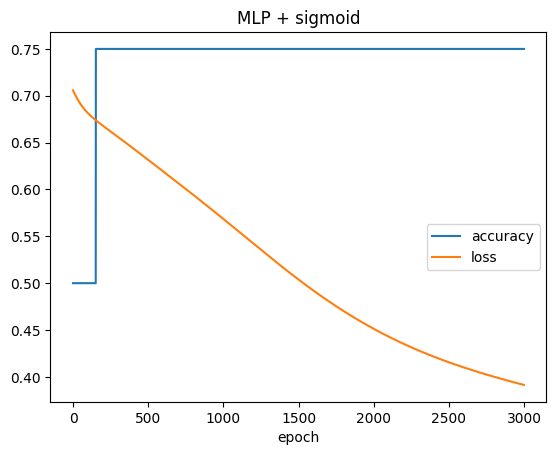

In [46]:
# 시각화하기
import matplotlib.pyplot as plt

plt.title('MLP + sigmoid')
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], bbox_to_anchor=(1, 0.5))
plt.xlabel('epoch')

plt.show()